Le code a été récupéré à cette adresse [https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [5]:
img = cv.imread('B168/B_168_15-2-1_0002.jpg',0)

In [6]:
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

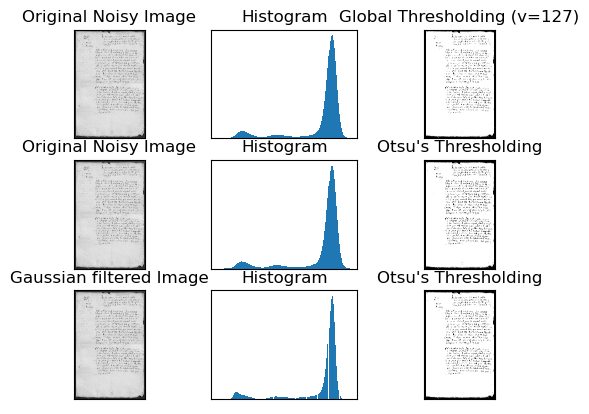

In [45]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

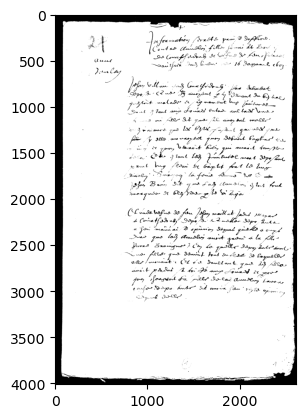

In [32]:
plt.imshow(th1,'gray')
plt.show()

In [33]:
ret2

145.0

In [12]:
cv.imwrite("gris.jpeg", th1)

True

In [7]:
cv.imwrite("gris_Otsu2.jpeg", th2)

True

In [16]:
cv.imwrite("gris_GaussOtsu.jpeg", th3)

True

# Script pour binariser un gros lot de fichiers

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.image as mpimg

In [ ]:
img = cv.imread('B168/B_168_15-2-1_0001.jpg',0)

In [ ]:
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

In [2]:
def binariser(dossier_source:str, dossier_binarisé:str):
    files2 = os.listdir(dossier_source) # tous les fichiers dans le dossier
    dossierbinar = []
    for img in files2:
        if img.endswith(".jpg"):
            
            image_path = os.path.join(dossier_source,img)

            image = cv.imread(image_path,0)
            
            # global thresholding
            ret1,th1 = cv.threshold(image,127,255,cv.THRESH_BINARY)
            # Otsu's thresholding
            ret2,th2 = cv.threshold(image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
            
            dossierbinar.append(th2)

            nom, ext = os.path.splitext(img) # Séparer nom et extension dans deux variables différentes.
            renom = nom + ext #Modifier le nom en ajoutant un suffixe avant l'extension.
            enregistrement = os.path.join(dossier_binarisé, renom) #Établir le chemin où enregistrer.
            cv.imwrite(enregistrement, th2) #Enregistrer

    return

In [3]:
binariser(dossier_source="B168", dossier_binarisé="B168binar")